# Model Development
In data analytics, Model Development is often used to help us predict future observations from the data we have.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/Yaswanth/Documents/GitHub/NoteBooks/Datasets/TheCars_Dev.csv")
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

# 1.Linear Regression and Multiple Linear Regression

<b>Simple Linear Regression</b>

<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could "highway-mpg" help us predict car price?</h4>
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [8]:
X = df[["highway-mpg"]]
Y = df["price"]
lm.fit(X, Y)

LinearRegression()

In [9]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
lm.intercept_

38423.3058581574

In [11]:
lm.coef_

array([-821.73337832])

In [12]:
Price_highway_mpg = 38423.31 - 821.73 * df[["highway-mpg"]]
Price_highway_mpg

,highway-mpg
0,16236.60
1,16236.60
2,17058.33
3,13771.41
4,20345.25
...,...
196,15414.87
197,17880.06
198,19523.52
199,16236.60


In [13]:
lm1 = LinearRegression()
lm1.fit(df[["engine-size"]], df["price"])
print(lm1.intercept_)
print(lm1.coef_)

-7963.338906281024
[166.86001569]


In [14]:
Price_engine_size = -7963.34 + 166.86 * df[["engine-size"]]
Price_engine_size

,engine-size
0,13728.46
1,13728.46
2,17399.38
3,10224.40
4,14729.62
...,...
196,15563.92
197,15563.92
198,20903.44
199,16231.36


<b>Multiple Linear Regression</b>
<p>Other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

Developing a model using these variables as the predictor variables.

In [15]:
z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
lm.fit(z, df["price"])
print(lm.intercept_)
print(lm.coef_)

-15806.624626329227
[53.49574423  4.70770099 81.53026382 36.05748882]


##### Creating and training a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [16]:
lm2 = LinearRegression()

lm2.fit(df[["normalized-losses", "highway-mpg"]], df["price"])

print(lm2.intercept_)
print(lm2.coef_)

38201.31327245728
[   1.49789586 -820.45434016]


# 2. Model Evaluation Using Visualization

Now, I've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

In [17]:
import seaborn as sns
%matplotlib inline

Let's visualize highway-mpg as potential predictor variable of price:

(0.0, 48179.85223946877)

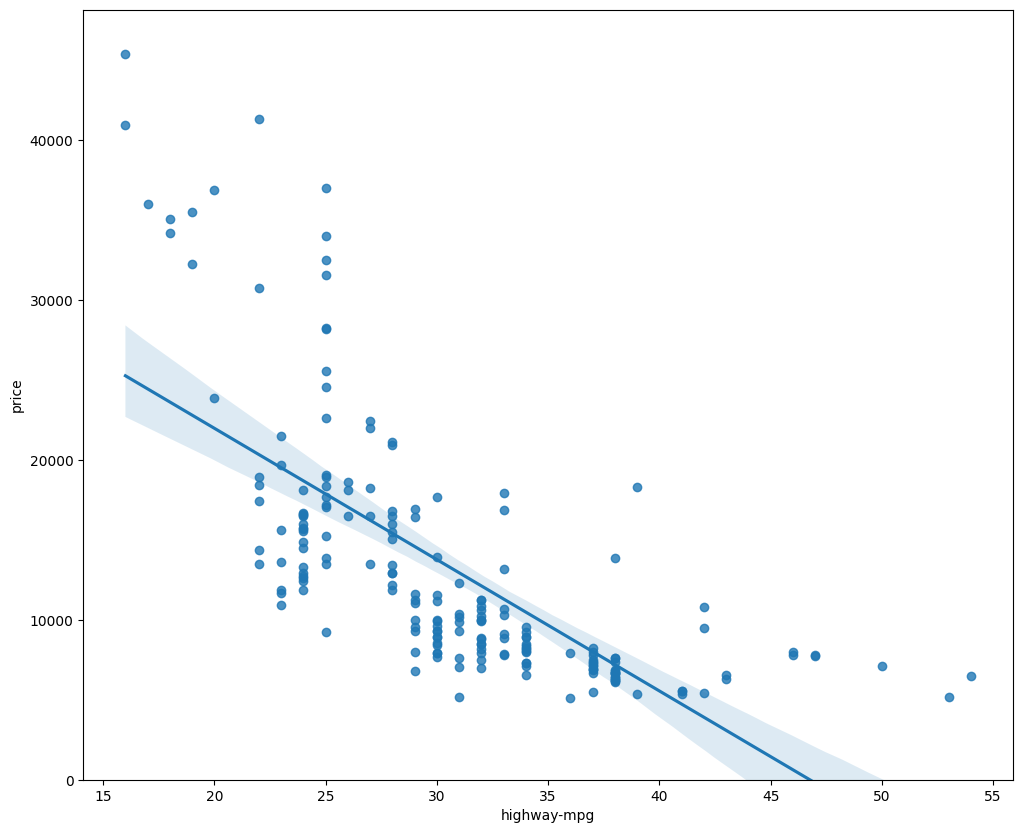

In [18]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give us a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".</p>

(0.0, 47414.1)

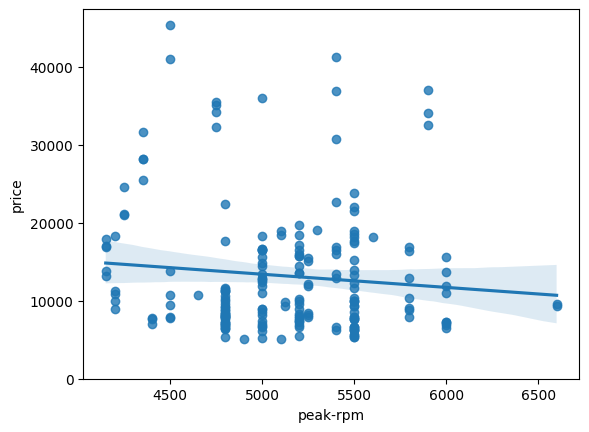

In [19]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

is "peak-rpm" or "highway-mpg" more strongly correlated with "price"?

In [20]:
df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [21]:
from scipy import stats

In [22]:
for col in ["peak-rpm", "highway-mpg"]:
    print(col)
    co_eff, p_value = stats.pearsonr(df[col], df["price"])
    print(co_eff," ",p_value)

peak-rpm
-0.10161587407588148   0.15117691651445295
highway-mpg
-0.704692265058953   1.7495471144475452e-31


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


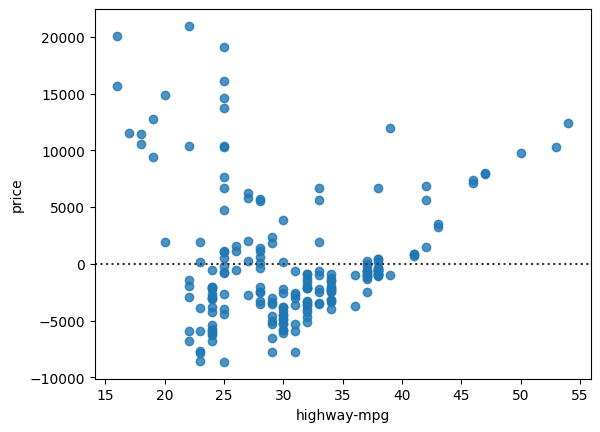

In [23]:
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>

<b>Multiple Linear Regression</b>
<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


In [24]:
# First, let's make a prediction:
Y_hat = lm.predict(z)

C:\Users\Yaswanth\AppData\Local\Temp\ipykernel_6160\788976769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Yaswanth\AppData\Local\Temp\ipykernel_6160\788976769.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

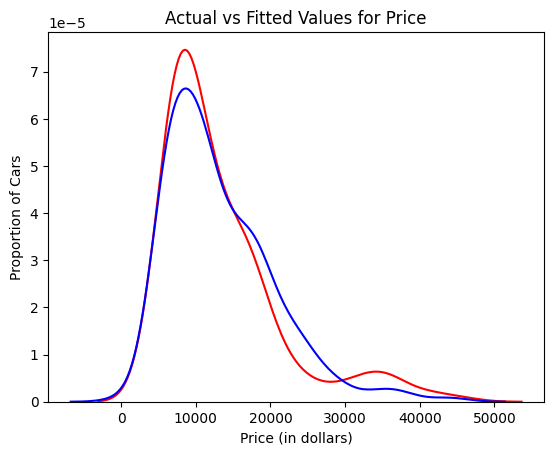

In [25]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

# 3. Polynomial Regression and Pipelines

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd Order</b>
<br>
Yhat = a + b_1 X +b_2 X^2 
</center>

<br>

<center><b>Cubic - 3rd Order</b>
<br>
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3
</center>

<br>

<center><b>Higher-Order</b>:
<br>
Y = a + b_1 X +b_2 X^2 +b_3 X^3 +b_4 X^4 ....
</center>

<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>

In [26]:
# We will use the following function to plot the data:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [27]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function

In [28]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


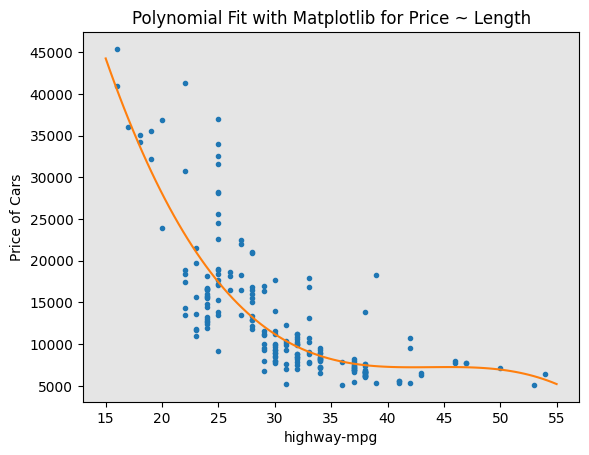

In [29]:
# Let's plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [30]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

In [31]:
# Creating 11 order polynomial model with the variables x and y from above.
f1 = np.polyfit(x, y, 11)
p11 = np.poly1d(f1)
print(p11)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


In [32]:
# We can perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
# We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [34]:
Z_pr=pr.fit_transform(z)

In [35]:
z.shape

(201, 4)

In [36]:
Z_pr.shape

(201, 15)

## Pipeline
<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

creating the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [38]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [39]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [40]:
z = z.astype('float')
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [42]:
ypipe = pipe.predict(z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Creating a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [44]:
anInput = [('scale', StandardScaler()),('model', LinearRegression())]
pipe2 = Pipeline(anInput)
pipe2.fit(z,y)
ypipe2 = pipe2.predict(z)
ypipe2[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# 4. Measures for In-Sample Evaluation

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


### Model 1: Simple Linear Regression

In [47]:
#highway_mpg_fit
lm.fit(X, Y)
Yhat = lm.predict(X)
Yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

Let's calculate the R^2:

In [45]:
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


Let's calculate the MSE:

In [49]:
# Let's import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:

In [50]:
mse = mean_squared_error(df["price"], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Model 2: Multiple Linear Regression

In [51]:
lm.fit(z,df["price"])
Y_Predict_Multifit = lm.predict(z)
Y_Predict_Multifit[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

Let's calculate the R^2:

In [52]:
lm.score(z,df["price"])

0.8093562806577457

Let's calculate the MSE.

In [54]:
print(mean_squared_error(df["price"], Y_Predict_Multifit))

11980366.87072649


### Model 3: Polynomial Fit

<p>Let's calculate the R^2.</p>
<p>Let’s import the function r2_score from the module metrics as we are using a different function.</p>

In [55]:
from sklearn.metrics import r2_score

In [56]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906521


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

<p>Let's calculate the MSE.</p>

In [58]:
mean_squared_error(df['price'], p(x))

20474146.426361203